## MLP Classifier for predicting abnormality in the structure of a Spine

The dataset comes with 12 attributes as potential predictors for the 2 classes of spine structure, 'normal' and 'abnormal'.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('C:/../Dataset_spine.csv')

The last column offers descriptions about the different attributes so we drop it.

In [4]:
attributes = df['Unnamed: 13']
df = df.drop(['Unnamed: 13'], axis=1)

The following are the variables being considered:

In [5]:
attributes[0:17]

0                                                   NaN
1                                                   NaN
2     Prediction is done by using binary classificat...
3                                                   NaN
4                                                   NaN
5            Attribute1  = pelvic_incidence  (numeric) 
6                   Attribute2 = pelvic_tilt (numeric) 
7         Attribute3 = lumbar_lordosis_angle (numeric) 
8                  Attribute4 = sacral_slope (numeric) 
9                 Attribute5 = pelvic_radius (numeric) 
10     Attribute6 = degree_spondylolisthesis (numeric) 
11                    Attribute7= pelvic_slope(numeric)
12                     Attribute8= Direct_tilt(numeric)
13                  Attribute9= thoracic_slope(numeric)
14                  Attribute10= cervical_tilt(numeric)
15                    Attribute11=sacrum_angle(numeric)
16                Attribute12= scoliosis_slope(numeric)
Name: Unnamed: 13, dtype: object

In [6]:
df.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal  
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal  
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal  
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal  
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal

In [7]:
df.describe()

Col1        Col2        Col3        Col4        Col5        Col6  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean    60.496653   17.542822   51.930930   42.953831  117.920655   26.296694   
std     17.236520   10.008330   18.554064   13.423102   13.317377   37.559027   
min     26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179   
25%     46.430294   10.667069   37.000000   33.347122  110.709196    1.603727   
50%     58.691038   16.357689   49.562398   42.404912  118.268178   11.767934   
75%     72.877696   22.120395   63.000000   52.695888  125.467674   41.287352   
max    129.834041   49.431864  125.742385  121.429566  163.071041  418.543082   

             Col7        Col8        Col9       Col10       Col11       Col12  
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000  
mean     0.472979   21.321526   13.064511   11.933317  -14.053139   25.645981  
std      0.285787    8.639423    3.399713    2.893265   12.225582   10.450558  
min      0.003220    7.027000    7.037800    7.030600  -35.287375    7.007900  
25%      0.224367   13.054400   10.417800    9.541140  -24.289522   17.189075  
50%      0.475989   21.907150   12.938450   11.953835  -14.622856   24.931950  
75%      0.704846   28.954075   15.889525   14.371810   -3.497094   33.979600  
max      0.998827   36.743900   19.324000   16.821080    6.972071   44.341200

## Pairplots

It can be seen that columns 7 through to 12 have values indiscriminately distributed among the 2 classes and thus have no useful information to exploit in attempting to predict the target values of the classes. Therefore, I have chosen to eliminate them.

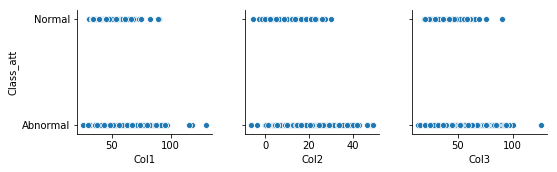

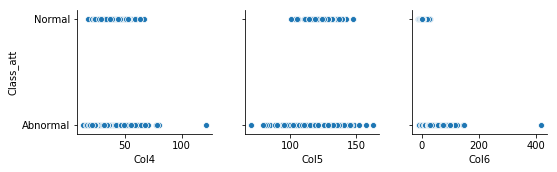

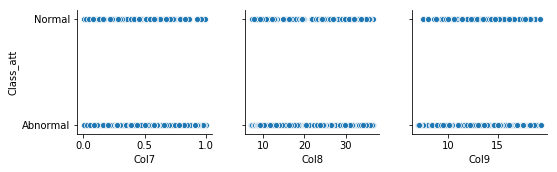

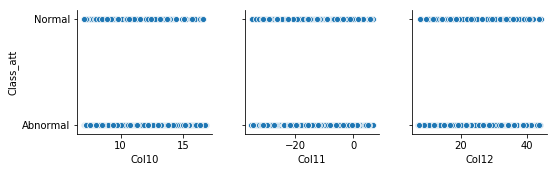

In [8]:
sns.pairplot(data=df,
                  y_vars=['Class_att'],
                  x_vars=['Col1','Col2','Col3'])
sns.pairplot(data=df,
                  y_vars=['Class_att'],
                  x_vars=['Col4','Col5','Col6'])
sns.pairplot(data=df,
                  y_vars=['Class_att'],
                  x_vars=['Col7','Col8','Col9'])
sns.pairplot(data=df,
                  y_vars=['Class_att'],
                  x_vars=['Col10','Col11','Col12',])

This can be seen more clearly below along the diagonal where the distributions with respect to each class can be seen for each attribute.

**Note**: The pairplot below may take some time so please be patient.

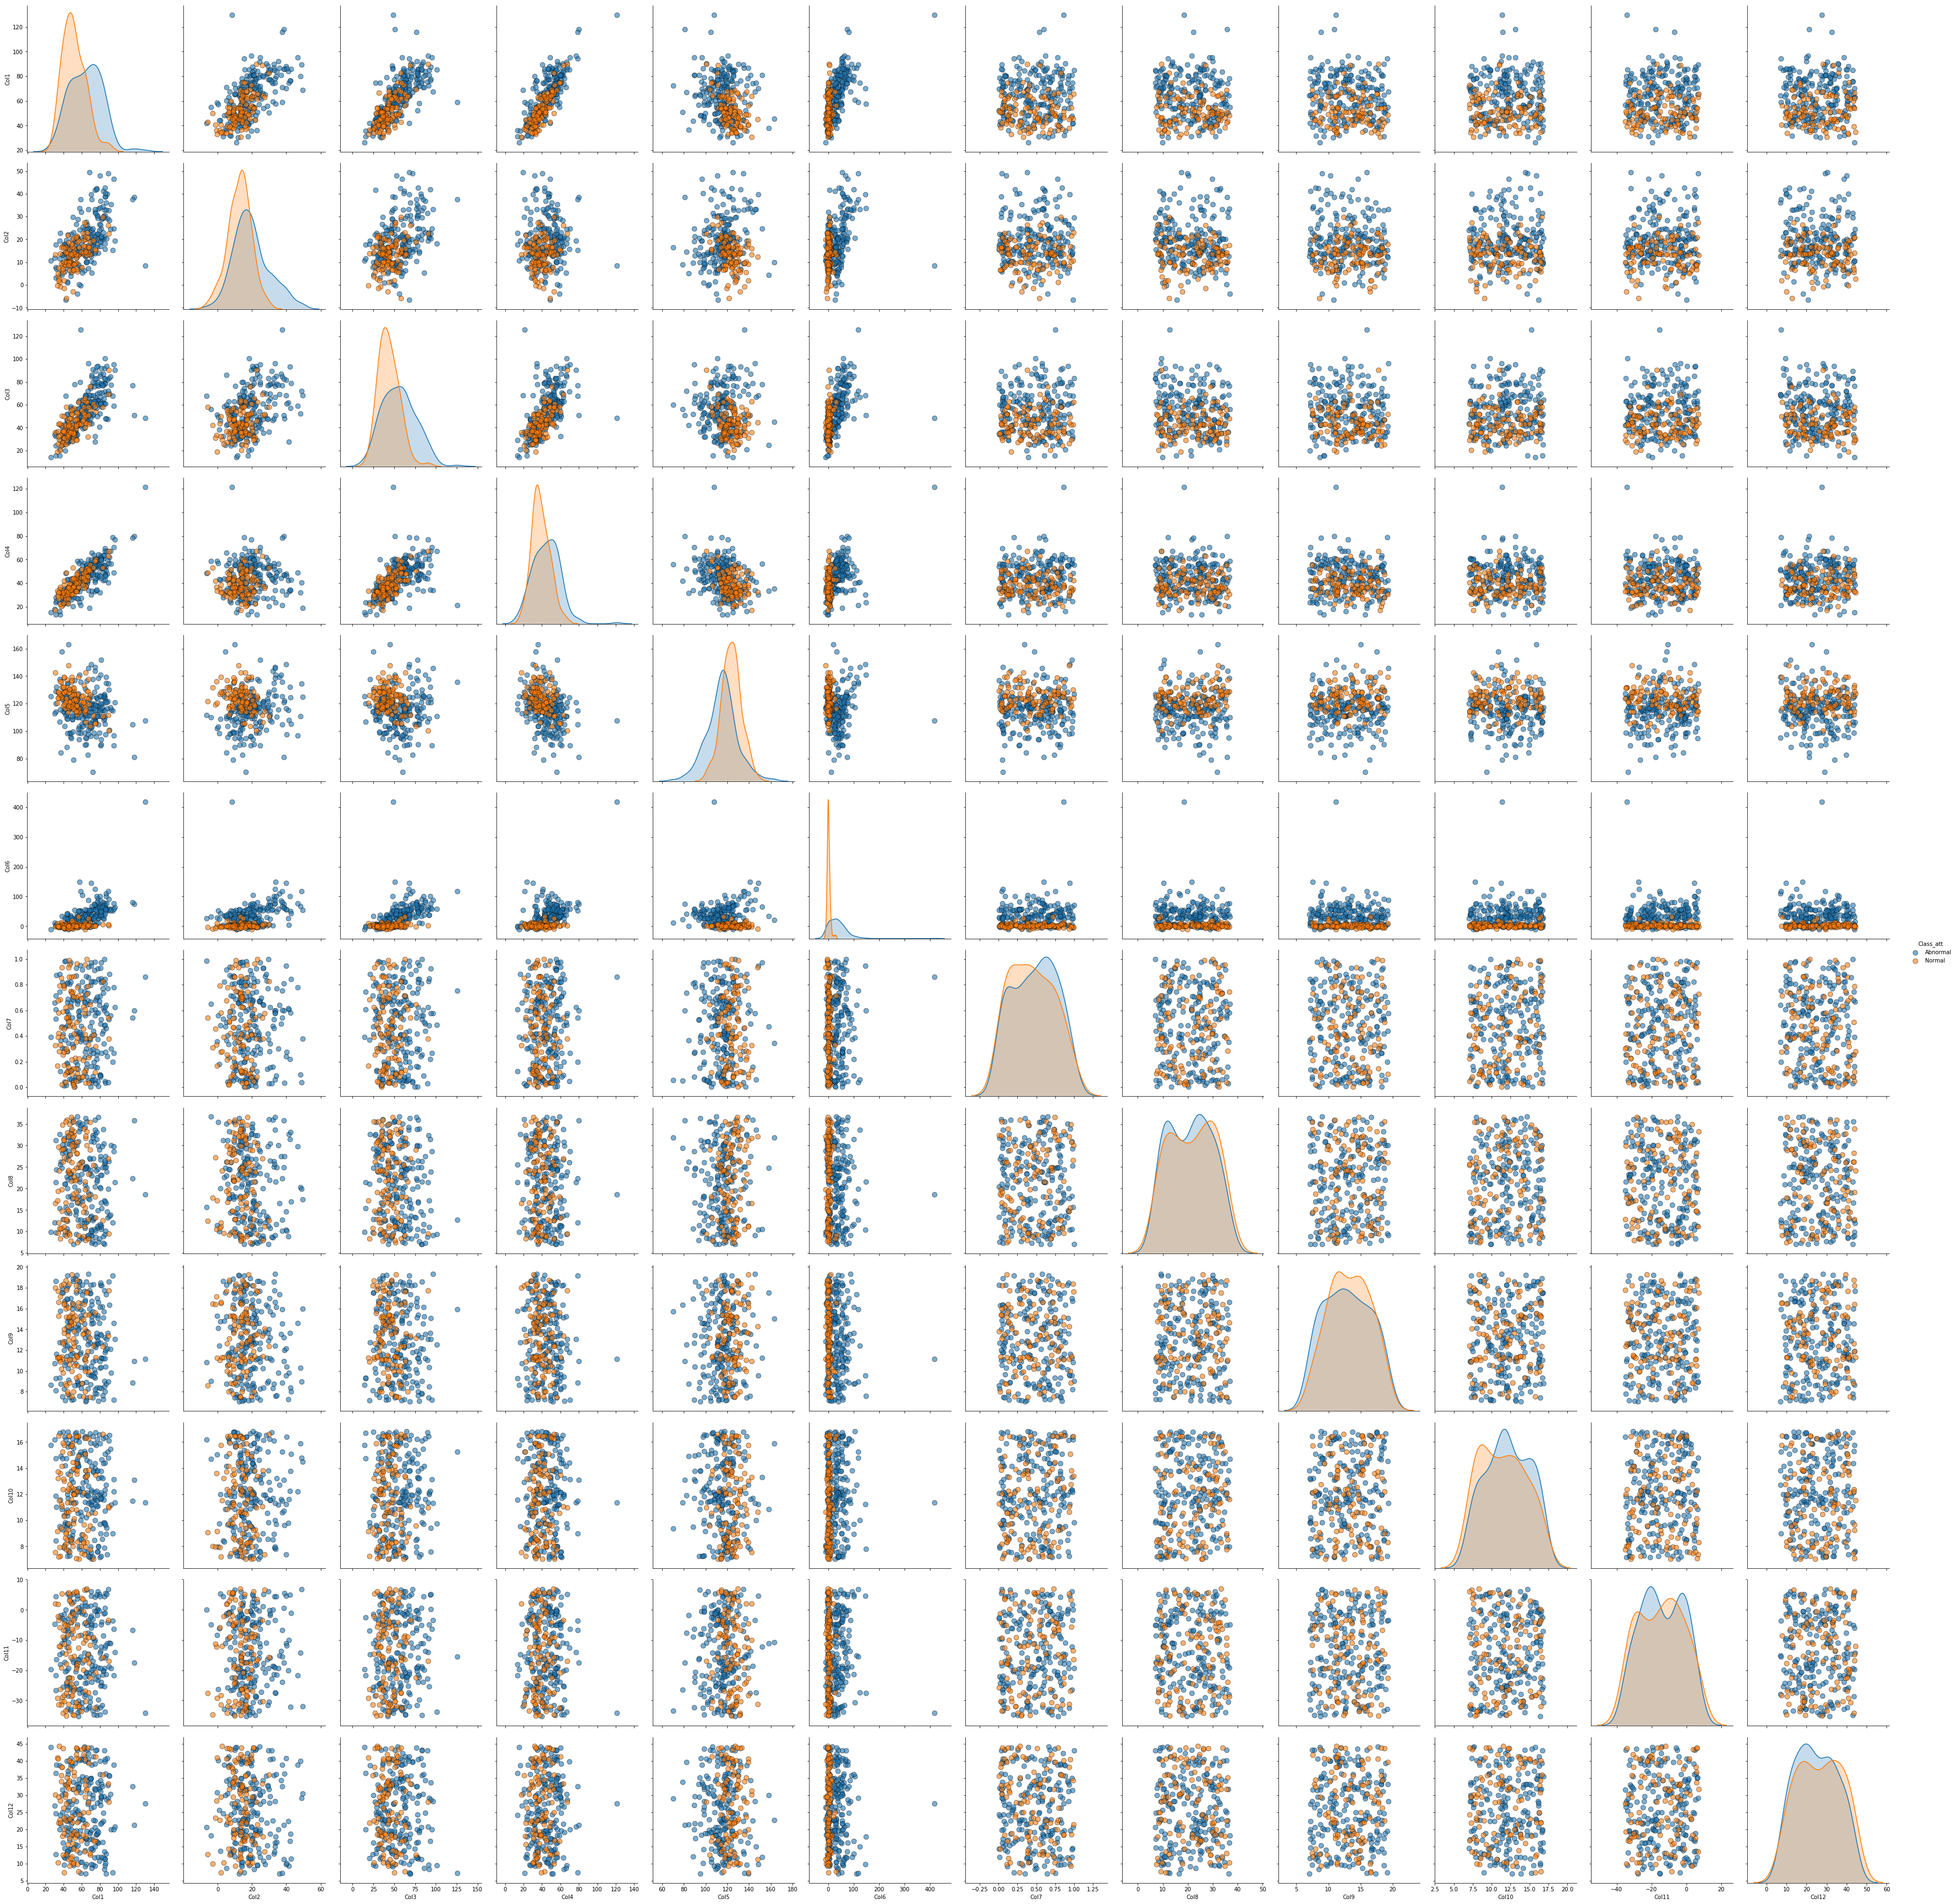

In [9]:
sns.pairplot(data=df, hue = 'Class_att', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

In [10]:
df = df.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)

In [11]:
df.head()

Col1       Col2       Col3       Col4        Col5       Col6 Class_att
0  63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Abnormal
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Abnormal
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Abnormal
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Abnormal
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Abnormal

Separating the predictors from the target

In [12]:
y = df['Class_att']
x = df.drop(['Class_att'], axis=1)

As well as train and test sets

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

Normalization showed a significant improvement in prediction accuracy.

In [14]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## A first run of the MLP Classifier

Rectified Linear Units(ReLU) performed better than the other ones, specifically sigmoid. One of the reasons is that ReLU does not suffer from the 'vanishing gradient' problem as is the case with Sigmoid and TanH, where the gradient is susceptible to becoming 'vanishingly' small, effectively rendering the respective weights useless and unable to change its value.

Stochastic Gradient Descent outperformed the Adam optimizer for the fact that for this problem there is a utility in exploring the different learning rates. Adam maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

Hence in the grid search applied to the parameters further down the notebook, 'ReLU' and 'sgd' remain constant.

First, a run with Stratified Cross validation. Given a dichotomous class problem, stratified cross validation ensures that each fold contains roughly the same proportions of the two types of class labels.

However, the simple model that follows this one performs even better. Perhaps this is due a requirement for more extensive training.

In [27]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', activation = 'relu', random_state=21,tol=0.000000001)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=21)
results = cross_val_score(clf, x, y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 81.61% (7.91%)


A simpler model.

In [29]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', activation = 'relu', random_state=21,tol=0.000000001)

In [30]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Results of the simple model

In [31]:
accuracy_score(y_test, y_pred)

0.8589743589743589

There are quite a few false positives

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  8],
       [ 3, 22]], dtype=int64)

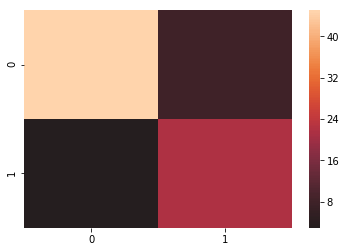

In [33]:
sns.heatmap(cm, center=True)
plt.show()

## Parameter Grid Search (warning: multi-threading enabled)

As stated above, I am sticking with 'sgd' for solver and 'relu' for the activation function. However, I perform a grid search over 'alpha'(L2 penalty (regularization term) parameter), hidden layer sizes and learning rate.

The **L2 parameter** norm penalty commonly known as **Weight decay** is one of the simplest and most common kinds of regularization technique which forces the weights to become smaller, by adding a parameter norm $\Omega(θ)=1/2||w||_2^2$ penalty to the objective function. This is necessary since large weights values will cause neural networks to overfit.

Just a note on the hidden layer sizes, given the high number of permutations, I have restricted to experimenting with 10, 50 and 100 neurons with 1,2 and 3 layers of neurons. Also, in order to take advantage of a grid search over learning rate, I picked Stocahstic Gradient Descent over Adam as the solver.

A 2.5 percent increase can be seen in prediction accuracy thanks to parameter grid search.

In [22]:
%%time
s = [0.0001,0.001,0.01,0.1]

parameters = {'alpha': 10.0 ** -np.arange(1, 5), 'solver' : ['sgd'], 'activation' : ['relu'],
              'hidden_layer_sizes':[(10,),(50,),(100,),(10,10),(50,50),(100,100),
                                    (10,10,10),(50,50,50),(100,100,100)], 
              'random_state':[0,1,2], 'learning_rate_init' : s}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=3,
                           scoring='accuracy')


clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(clf.score(x_train, y_train))
print(clf.best_params_)

0.8836206896551724
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01, 'random_state': 2, 'solver': 'sgd'}
Wall time: 8min 5s
